In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
## Data processing

In [6]:
## Training Image Processsing

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [10]:
### Validation Image Preprocessing

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [14]:
training_set


<BatchDataset shapes: ((None, 128, 128, 3), (None, 38)), types: (tf.float32, tf.float32)>

In [16]:
for x, y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[146.   147.   178.  ]
   [146.   147.   178.  ]
   [144.25 145.25 176.25]
   ...
   [144.   145.   175.  ]
   [141.   142.   172.  ]
   [148.75 149.75 179.75]]

  [[146.   147.   178.  ]
   [146.   147.   178.  ]
   [145.   146.   177.  ]
   ...
   [150.25 151.25 181.25]
   [142.75 143.75 173.75]
   [149.5  150.5  180.5 ]]

  [[145.75 146.75 177.75]
   [146.75 147.75 178.75]
   [146.25 147.25 178.25]
   ...
   [143.   144.   174.  ]
   [148.   149.   179.  ]
   [141.25 142.25 172.25]]

  ...

  [[139.   130.   157.  ]
   [140.25 131.25 158.25]
   [135.25 126.25 153.25]
   ...
   [132.   124.   147.  ]
   [129.   121.   144.  ]
   [123.75 115.75 138.75]]

  [[143.75 134.75 161.75]
   [139.25 130.25 157.25]
   [144.   135.   162.  ]
   ...
   [143.   135.   158.  ]
   [136.75 128.75 151.75]
   [143.5  135.5  158.5 ]]

  [[137.5  128.5  155.5 ]
   [140.75 131.75 158.75]
   [140.5  131.5  158.5 ]
   ...
   [151.25 143.25 166.25]
   [161.5  153.5  176.5 ]
   [136.   128.   15

In [18]:
## Build Model

In [20]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [22]:
model= Sequential()

In [24]:
## Building Convulation Layer

In [26]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Dropout(0.25))

In [38]:
model.add(Flatten())

In [40]:
model.add(Dense(units=1500, activation='relu'))

In [42]:
model.add(Dropout(0.4))

In [44]:
#Output layer
model.add(Dense(units=38, activation='softmax'))

In [46]:
## Compiling Model

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 128)       7

In [52]:
## Model Training


In [54]:
print(tf.config.list_physical_devices('GPU'))

[]


In [57]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 2845s 1s/step - loss: 1.3162 - accuracy: 0.6127 - val_loss: 0.5670 - val_accuracy: 0.8238
Epoch 2/10
2197/2197 [==============================] - 2847s 1s/step - loss: 0.4319 - accuracy: 0.8617 - val_loss: 0.3205 - val_accuracy: 0.8959
Epoch 3/10
2197/2197 [==============================] - 2836s 1s/step - loss: 0.2571 - accuracy: 0.9178 - val_loss: 0.2026 - val_accuracy: 0.9354
Epoch 4/10
2197/2197 [==============================] - 2840s 1s/step - loss: 0.1828 - accuracy: 0.9407 - val_loss: 0.1987 - val_accuracy: 0.9346
Epoch 5/10
2197/2197 [==============================] - 2855s 1s/step - loss: 0.1344 - accuracy: 0.9558 - val_loss: 0.1654 - val_accuracy: 0.9488
Epoch 6/10
2197/2197 [==============================] - 2841s 1s/step - loss: 0.0999 - accuracy: 0.9677 - val_loss: 0.1267 - val_accuracy: 0.9599
Epoch 7/10
2197/2197 [==============================] - 2868s 1s/step - loss: 0.0813 - accuracy: 0.9727 - val_loss: 0.1030 -

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


In [59]:
## model evaluation

In [61]:
### Model evaluation on training set

In [63]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 433s 197ms/step - loss: 0.0548 - accuracy: 0.9819


In [65]:
print(train_loss,train_acc)

0.05479849502444267 0.9819332957267761


In [67]:
### Model evaluation on validation set

In [69]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 107s 194ms/step - loss: 0.1471 - accuracy: 0.9550


In [71]:
print(val_loss,val_acc)

0.14707612991333008 0.9550421237945557


In [73]:
## Saving Model

In [75]:
model.save("trained_model.keras")

In [77]:
training_history.history

{'loss': [1.3161941766738892,
  0.43188372254371643,
  0.25709471106529236,
  0.18284042179584503,
  0.13443411886692047,
  0.09994924813508987,
  0.08127346634864807,
  0.07122014462947845,
  0.06279929727315903,
  0.05341324210166931],
 'accuracy': [0.6126893758773804,
  0.8616971373558044,
  0.9178320169448853,
  0.9407497048377991,
  0.955814778804779,
  0.9676505923271179,
  0.9726722836494446,
  0.9763709902763367,
  0.9797567129135132,
  0.9827299118041992],
 'val_loss': [0.5669649243354797,
  0.32046744227409363,
  0.20259688794612885,
  0.1987176239490509,
  0.1653968244791031,
  0.12671086192131042,
  0.1029881164431572,
  0.14900265634059906,
  0.14487500488758087,
  0.1470760554075241],
 'val_accuracy': [0.8237537145614624,
  0.8959139585494995,
  0.9354085922241211,
  0.9345549941062927,
  0.9487821459770203,
  0.959936261177063,
  0.9702936410903931,
  0.9535055756568909,
  0.9547006487846375,
  0.9550421237945557]}

In [79]:
# Recording Model History In json format
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [81]:
training_history.history['val_accuracy']

[0.8237537145614624,
 0.8959139585494995,
 0.9354085922241211,
 0.9345549941062927,
 0.9487821459770203,
 0.959936261177063,
 0.9702936410903931,
 0.9535055756568909,
 0.9547006487846375,
 0.9550421237945557]

In [83]:
# Accuracy Visualization

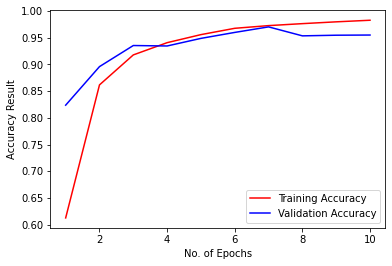

In [91]:
epochs = list(range(1, 11))  # Convert generator to list
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.legend()
plt.show()


In [93]:
# Some Other Matrix for model evaluation

In [97]:
class_names = validation_set.class_names  # Notice 'class_names' instead of 'class_name'
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [100]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [ ]:
true_categories

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

In [ ]:
from sklearn.matrics import classification report

In [ ]:
print( classification_report(Y_true, y_pred, labels=None, target_names=class_name))

In [ ]:
cm= confusion_matrix(Y_true, y_pred)
cm.shape

In [ ]:
### Confusion Matrix Visualization

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True,annot_kwa={'size': 10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction matrix",fontsize=25)
plt.show()